In [1]:
import numpy as np
import time
import sys
from PIL import Image
import matplotlib.pyplot as plt
import MyTorch.nn as nn

In [ ]:
def accuracy_runtime(X_test, l_test, model):
    img, label = X_test, l_test
    img = img/255
    Y_hat = model.forward(img)
    Y_hat = np.argmax(Y_hat, axis=1)
    acc = np.mean(Y_hat==l_test)
    return acc*100

def accuracy_runtime_mlp(X_test, l_test, model):
    Y_hat = model.forward(X_test)
    Y_hat = np.argmax(Y_hat, axis=0)
    acc = np.mean(Y_hat==l_test)
    return acc*100

## **train models**

### Data Extract

In [77]:
data = np.load("/content/drive/MyDrive/kmnist-train-imgs.npz")['arr_0']
labels = np.load("/content/drive/MyDrive/kmnist-train-labels.npz")['arr_0']
data_test = np.load("/content/drive/MyDrive/kmnist-test-imgs.npz")['arr_0']
labels_test = np.load("/content/drive/MyDrive/kmnist-test-labels.npz")['arr_0']

In [78]:
print(np.unique(labels))

[0 1 2 3 4 5 6 7 8 9]


In [79]:
split = 0.2  # 80% train, 20% validation

# Calculate the index to split the data
split_index = int(data.shape[0] * split)

# Split the data into train and validation sets
train_data = np.expand_dims(data[:split_index], axis=1)
validation_data = np.expand_dims(data[split_index:], axis=1)
train_label = (labels[:split_index])
validation_label = (labels[split_index:])

test_data = np.expand_dims(data_test, axis=1)
test_labels = labels_test

In [80]:
validation_data.shape

(48000, 1, 28, 28)

In [81]:
print(train_label.shape)

(12000,)


### **Classification of K-Mnist using CNN**

In [62]:
class modelCNN_Kmnist_():
    def __init__(self, lamda_l1 = 0, lamda_l2 = 0):

        # convolutional layers
        # conv2D(in_chan, out_chan, size, stride=1, padding=0, acti=None, l1_reg=0.0, l2_reg=0.0)
        conv = [
                nn.Conv2D(1, 2, 5, stride = 1, padding = 2),                     # Dimensions: 2x12x12
                nn.ReLU()
                ]
        # Linear layers
        # nodes = [2*12*12, 2*24*24, 10]
        nodes = [2*28*28, 50, 10]
        linear = [
                  nn.linearLayer(nodes[0], nodes[1]),
                  nn.ReLU(),
                  nn.linearLayer(nodes[1], nodes[2]),
                  nn.Softmax()]
        self.network = conv + [nn.Reshape()] + linear

    def forward(self, x):
        output = x
        for layer in self.network:
            output = layer.forward(output)
        return output

    def backward(self, x1, learning_rate):
        grad = x1
        for layer in reversed(self.network):
            grad = layer.backward(grad, learning_rate)
        return


In [64]:
learning_rate = 0.001
epochs = 40
modelCNN_Kmnist2 = modelCNN_Kmnist_()
losscriteria = nn.CrossEntropyLoss()
acc_val = []
acc_test = []
acc_train = []
loss_train = []
loss_test = []
b = 20
N_train = len(train_label)
l_r = learning_rate
for e in range(epochs):
    loss = 0
    t0 = time.time()
    # if e+1>=5:
    #   if e+1==5:
    #     learning_rate = 0.05
    #   l_r = learning_rate/np.log10(e)
    count = 0
    for i in range(0, N_train, b):
        img, label = train_data[i:i+b], train_label[i:i+b]
        img = img/255

        # forward
        Y_hat = modelCNN_Kmnist2.forward(img)
        loss += losscriteria.evaluate(Y_hat, label)

        # backprop
        loss_grad = losscriteria.grad()
        modelCNN_Kmnist2.backward(loss_grad, l_r)
        # print("completed batch {}:{}".format(i+1,i+b))
        # print("running loss = {}".format(loss))
        count += 1
    loss /= count
    t1 = time.time()
    tst = test_data/255
    # loss_test.append(losscriteria.evaluate(modelCNN_Kmnist.forward(tst), test_labels))
    # ac = accuracy_runtime(validation_data, validation_label, modelCNN_Kmnist)
    ac_trn = accuracy_runtime(train_data, train_label, modelCNN_Kmnist2)
    # ac_tst = accuracy_runtime(test_data, test_labels, modelCNN_Kmnist)
    # acc_val.append(ac)
    # acc_test.append(ac_tst)
    acc_train.append(ac_trn)
    print("Time taken for epoch", e+1,":", t1 - t0, "seconds")

    # # display loss
    print("completed: loss/train example = {}, train accuracy = {}%".format(loss, ac_trn))
    loss_train.append(loss)

Time taken for epoch 1 : 21.926713466644287 seconds
completed: loss/train example = 2.423823016817286, train accuracy = 9.941666666666666%
Time taken for epoch 2 : 20.51596236228943 seconds
completed: loss/train example = 2.3073822478602146, train accuracy = 9.841666666666667%
Time taken for epoch 3 : 22.743093252182007 seconds
completed: loss/train example = 2.3017226749384605, train accuracy = 10.25%
Time taken for epoch 4 : 21.876962661743164 seconds
completed: loss/train example = 2.3000346447060402, train accuracy = 10.241666666666667%
Time taken for epoch 5 : 20.888651371002197 seconds
completed: loss/train example = 2.296926685026739, train accuracy = 10.791666666666666%
Time taken for epoch 6 : 21.610353231430054 seconds
completed: loss/train example = 2.290196200284682, train accuracy = 13.025%
Time taken for epoch 7 : 23.403342962265015 seconds
completed: loss/train example = 2.275278400345658, train accuracy = 14.558333333333334%
Time taken for epoch 8 : 25.369173526763916 s

In [43]:
learning_rate = 0.005
epochs = 40
modelCNN_Kmnist = modelCNN_Kmnist_()
losscriteria = nn.CrossEntropyLoss()
acc_val = []
acc_test = []
acc_train = []
loss_train = []
loss_test = []
b = 200
N_train = len(train_label)
l_r = learning_rate
for e in range(epochs):
  loss = 0
  t0 = time.time()
  # if e+1>=5:
  #   if e+1==5:
  #     learning_rate = 0.05
  #   l_r = learning_rate/np.log10(e)
  for i in range(0, N_train, b):
    img, label = train_data[i:i+b], train_label[i:i+b]
    img = img/255

    # forward
    Y_hat = modelCNN_Kmnist.forward(img)
    loss += losscriteria.evaluate(Y_hat, label)

    # backprop
    loss_grad = losscriteria.grad()
    modelCNN_Kmnist.backward(loss_grad, l_r)
    # print("completed batch {}:{}".format(i+1,i+b))
    # print("running loss = {}".format(loss))

  t1 = time.time()
  tst = test_data/255
  # loss_test.append(losscriteria.evaluate(modelCNN_Kmnist.forward(tst), test_labels))
  # ac = accuracy_runtime(validation_data, validation_label, modelCNN_Kmnist)
  ac_trn = accuracy_runtime(train_data, train_label, modelCNN_Kmnist)
  # ac_tst = accuracy_runtime(test_data, test_labels, modelCNN_Kmnist)
  # acc_val.append(ac)
  # acc_test.append(ac_tst)
  acc_train.append(ac_trn)
  print("Time taken for epoch", e+1,":", t1 - t0, "seconds")

  # # display loss
  print("completed: loss = {}, train accuracy = {}%".format(loss, ac_trn))
  loss_train.append(loss)

Time taken for epoch 1 : 30.45804452896118 seconds
completed: loss = 514.9719315461683, train accuracy = 20.894444444444442%
Time taken for epoch 2 : 29.125574350357056 seconds
completed: loss = 384.24379353761276, train accuracy = 31.644444444444442%
Time taken for epoch 3 : 30.070830821990967 seconds
completed: loss = 331.82309229313756, train accuracy = 48.81388888888889%
Time taken for epoch 4 : 29.103747844696045 seconds
completed: loss = 256.0686380136153, train accuracy = 62.977777777777774%
Time taken for epoch 5 : 29.302457094192505 seconds
completed: loss = 200.0688796666227, train accuracy = 70.39166666666667%
Time taken for epoch 6 : 29.646422147750854 seconds
completed: loss = 172.51924958973652, train accuracy = 72.88333333333334%
Time taken for epoch 7 : 28.94451403617859 seconds
completed: loss = 158.71701050710996, train accuracy = 74.7%
Time taken for epoch 8 : 29.053566932678223 seconds
completed: loss = 149.52400145881396, train accuracy = 76.1%
Time taken for epoch

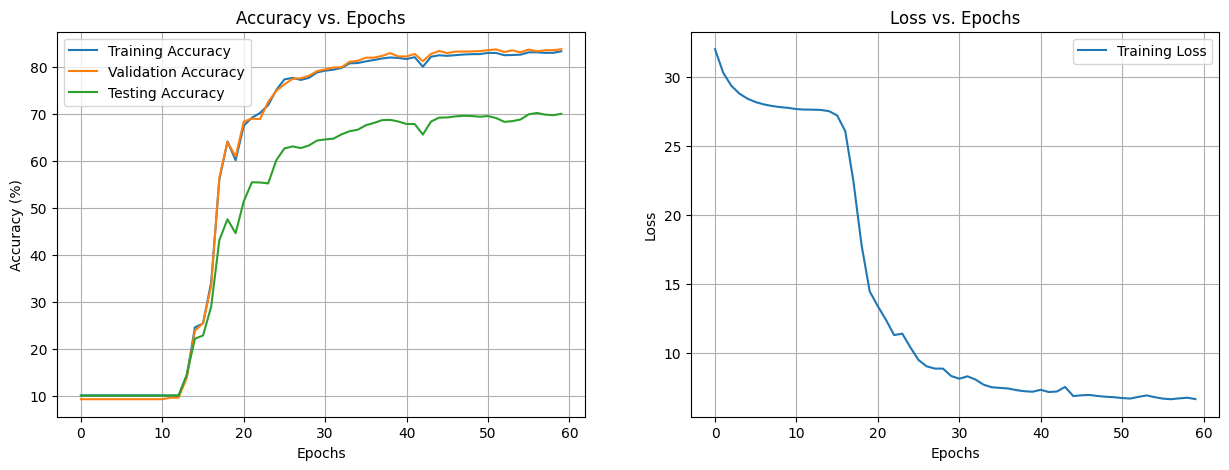

In [ ]:
natural_numbers = range(len(acc_train))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].grid(True)
axs[0].plot(natural_numbers, acc_train, label="Training Accuracy")
axs[0].plot(natural_numbers, acc_val, label="Validation Accuracy")
axs[0].plot(natural_numbers, acc_test, label="Testing Accuracy")

axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Accuracy vs. Epochs")
axs[0].legend()

axs[1].grid(True)
axs[1].plot(natural_numbers, loss_train, label="Training Loss")

axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].set_title("Loss vs. Epochs")
axs[1].legend()

plt.show()


### **Classification of K-mnist using MLP**

In [ ]:
class modelfcc_Kmnist_OF():
    def __init__(self, lamda_l1 = 0, lamda_l2 = 0):

        # Linear layers
        nodes = [1*28*28, 50, 20, 10]

        self.network = [
                        nn.Reshape(),
                        nn.linearLayer(nodes[0], nodes[1]),
                        nn.ReLU(),
                        nn.linearLayer(nodes[1], nodes[2]),
                        nn.ReLU(),
                        nn.linearLayer(nodes[2], nodes[3]),
                        nn.Softmax()
                        ]

    def forward(self, x):
        output = x
        for layer in self.network:
            output = layer.forward(output)
        return output

    def backward(self, x1, learning_rate):
        grad = x1
        for layer in reversed(self.network):
            grad = layer.backward(grad, learning_rate)
        return grad

def accuracy(X_test, l_test, model):
    N_test = X_test.shape[0]
    img, label = X_test, l_test
    img = img/255
    Y_hat = model.forward(img) #.flatten() print
    Y_hat = np.argmax(Y_hat, axis=0)
    acc = np.sum(Y_hat==label)/len(label)
    return acc*100

In [ ]:
learning_rate = 0.005
epochs = 50
modelMLP = modelfcc_Kmnist_OF()
losscriteria = nn.CrossEntropyLoss()
loss_test = []
acc_val = []
acc_train = []
acc_test = []
loss_train = []
b = 100
N_train = len(train_label)
for e in range(epochs):
    loss = 0
    t0 = time.time()
    for i in range(0, N_train, b):
        img, label = train_data[i:i+b], train_label[i:i+b]
        img = img/255

        # forward
        Y_hat = modelMLP.forward(img) #.flatten() print
        # print(Y_hat)
        # print(Y_hat.shape, label.shape)
        loss += losscriteria.evaluate(Y_hat, label)

        # backprop
        loss_grad = losscriteria.grad()
        modelMLP.backward(loss_grad, learning_rate)
    ac = accuracy_runtime(validation_data, validation_label, modelMLP)
    ac_trn = accuracy_runtime(train_data, train_label, modelMLP)
    ac_tst = accuracy_runtime(test_data, test_labels, modelMLP)
    acc_val.append(ac)
    acc_train.append(ac_trn)
    acc_test.append(ac_tst)
    t1 = time.time()
    print("Time taken for epoch", e+1,":", t1 - t0, "seconds")

    # display loss
    print("completed: loss = {}, val. accuracy = {}%, train accuracy = {}%".format(loss, ac, ac_trn))
    loss_train.append(loss)

Time taken for epoch 1 : 2.6314141750335693 seconds
completed: loss = 1164.9836983959688, val. accuracy = 10.2%, train accuracy = 10.929166666666665%
Time taken for epoch 2 : 4.815389633178711 seconds
completed: loss = 1081.704489805241, val. accuracy = 15.741666666666667%, train accuracy = 15.727083333333333%
Time taken for epoch 3 : 2.460197687149048 seconds
completed: loss = 1056.2272523294132, val. accuracy = 13.425%, train accuracy = 13.364583333333332%
Time taken for epoch 4 : 2.4181296825408936 seconds
completed: loss = 1032.3532763436397, val. accuracy = 16.866666666666667%, train accuracy = 16.464583333333334%
Time taken for epoch 5 : 2.4169702529907227 seconds
completed: loss = 1010.1074191721907, val. accuracy = 19.066666666666666%, train accuracy = 19.039583333333333%
Time taken for epoch 6 : 2.443267822265625 seconds
completed: loss = 974.5043775695237, val. accuracy = 24.85833333333333%, train accuracy = 24.579166666666666%
Time taken for epoch 7 : 4.506042003631592 secon

In [ ]:
print(accuracy_runtime(test_data, test_labels, modelMLP))

77.03999999999999


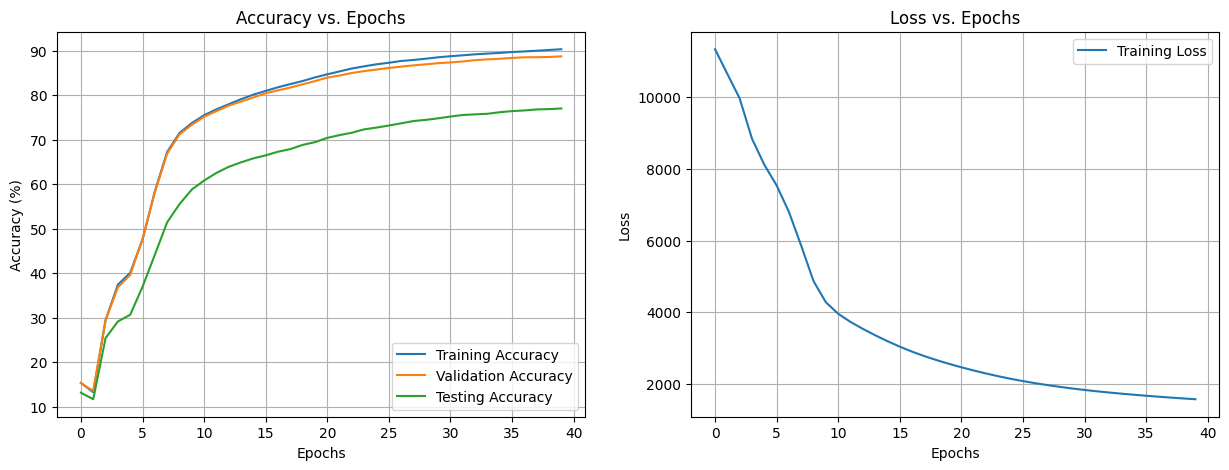

In [ ]:
natural_numbers = range(len(acc_train))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].grid(True)
axs[0].plot(natural_numbers, acc_train, label="Training Accuracy")
axs[0].plot(natural_numbers, acc_val, label="Validation Accuracy")
axs[0].plot(natural_numbers, acc_test, label="Testing Accuracy")

axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Accuracy vs. Epochs")
axs[0].legend()

axs[1].grid(True)
axs[1].plot(natural_numbers, loss_train, label="Training Loss")

axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].set_title("Loss vs. Epochs")
axs[1].legend()

plt.show()


**MSE**

In [ ]:
class modelfcc_Kmnist_OF_MSE():
    def __init__(self, lamda_l1 = 0, lamda_l2 = 0):

        # Linear layers
        nodes = [1*28*28, 50, 20, 10]

        self.network = [
                  nn.Reshape(),
                  nn.linearLayer(nodes[0], nodes[1]),
                  nn.ReLU(),
                  nn.linearLayer(nodes[1], nodes[2]),
                  nn.ReLU(),
                  nn.linearLayer(nodes[2], nodes[3]),
                  nn.softmax()]

    def forward(self, x):
        output = x
        for layer in self.network:
            output = layer.forward(output)
        return output

    def backward(self, x1, learning_rate):
        grad = x1
        for layer in reversed(self.network):
            grad = layer.backward(grad, learning_rate)
        return

def accuracy(X_test, l_test, model):
    N_test = X_test.shape[0]
    img, label = X_test, l_test
    img = img/255
    # forward
    Y_hat = model.forward(img) #.flatten() print
    Y_hat = np.argmax(Y_hat, axis=0)
    acc = np.sum(Y_hat==label)/len(label)
    return acc*100

In [ ]:
learning_rate = 0.001
epochs = 40
modelMLP = modelfcc_Kmnist_OF()
losscriteria = nn.MSE()
loss_test = []
acc_val = []
acc_train = []
acc_test = []
loss_train = []
b = 10
N_train = len(train_label)
for e in range(epochs):
    loss = 0
    t0 = time.time()
    for i in range(0, N_train, b):
        img, label = train_data[i:i+b], train_label[i:i+b]
        img = img/255

        # forward
        Y_hat = modelMLP.forward(img)
        loss += losscriteria.evaluate(Y_hat, nn.onehot(label, Y_hat.shape[0]))

        # backprop
        loss_grad = losscriteria.grad()
        modelMLP.backward(loss_grad, learning_rate)
    ac = accuracy_runtime(validation_data, validation_label, modelMLP)
    ac_trn = accuracy_runtime(train_data, train_label, modelMLP)
    ac_tst = accuracy_runtime(test_data, test_labels, modelMLP)
    acc_val.append(ac)
    acc_train.append(ac_trn)
    acc_test.append(ac_tst)
    t1 = time.time()
    print("Time taken for epoch", e+1,":", t1 - t0, "seconds")

    # display loss
    print("completed: loss = {}, val. accuracy = {}%, train accuracy = {}%".format(loss, ac, ac_trn))
    loss_train.append(loss)


Time taken for epoch 1 : 9.817649364471436 seconds
completed: loss = 2175.824549260024, val. accuracy = 11.266666666666666%, train accuracy = 11.65%
Time taken for epoch 2 : 5.084938049316406 seconds
completed: loss = 2149.1170219448486, val. accuracy = 10.766666666666666%, train accuracy = 11.081249999999999%
Time taken for epoch 3 : 8.038880825042725 seconds
completed: loss = 2127.385508951576, val. accuracy = 9.941666666666666%, train accuracy = 10.583333333333334%
Time taken for epoch 4 : 5.057180881500244 seconds
completed: loss = 2064.57776214941, val. accuracy = 30.091666666666665%, train accuracy = 30.806250000000002%
Time taken for epoch 5 : 6.434444189071655 seconds
completed: loss = 1930.7080313009697, val. accuracy = 39.15833333333333%, train accuracy = 39.233333333333334%
Time taken for epoch 6 : 6.591526508331299 seconds
completed: loss = 1799.6938138232915, val. accuracy = 44.583333333333336%, train accuracy = 44.479166666666664%
Time taken for epoch 7 : 5.05943298339843

In [ ]:
print(accuracy_runtime(test_data, test_labels, modelMLP))

74.31


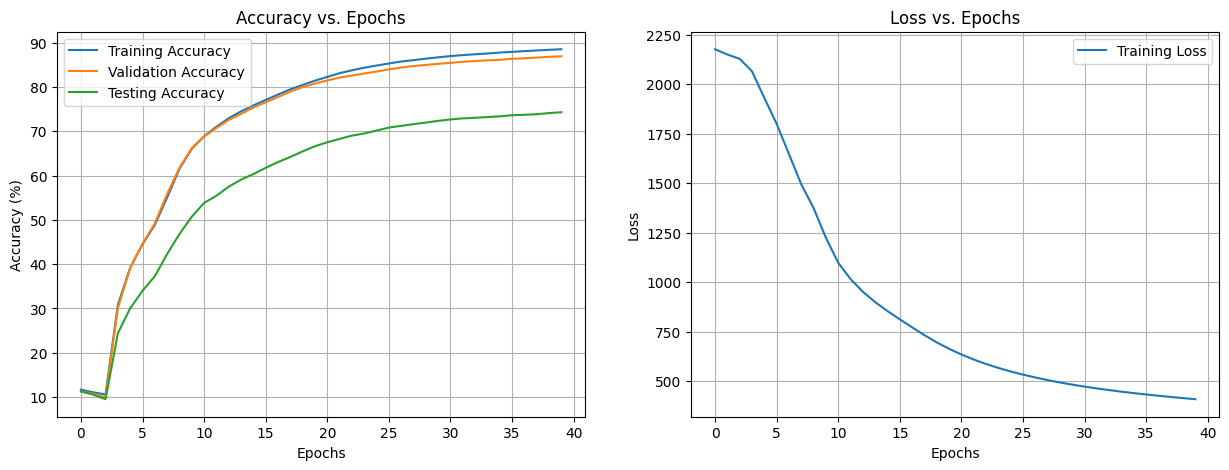

In [ ]:
natural_numbers = range(len(acc_train))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].grid(True)
axs[0].plot(natural_numbers, acc_train, label="Training Accuracy")
axs[0].plot(natural_numbers, acc_val, label="Validation Accuracy")
axs[0].plot(natural_numbers, acc_test, label="Testing Accuracy")

axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Accuracy vs. Epochs")
axs[0].legend()

axs[1].grid(True)
axs[1].plot(natural_numbers, loss_train, label="Training Loss")

axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].set_title("Loss vs. Epochs")
axs[1].legend()

plt.show()


### **MLP regression**

**Data Extraction**

In [140]:
data_path_1 = '/content/drive/MyDrive/PRNN_A1_q1.txt'

In [141]:
# Load data from 'example4.txt' (assuming it contains string values)
Data = np.genfromtxt(data_path_1, dtype=str, delimiter=",")

# labels of the data
column_labels = Data[0].split("\t")

# Extract data as integers, skipping the first line (column labels)
Data = np.array([[float(x) for x in line.strip().split("\t")] for line in Data[1:]])
np.random.shuffle(Data)
split = 0.6
Data_train = Data[:int(split*len(Data)),:]
n_trn , f = Data_train.shape
Data_test = Data[int(split*len(Data)):,:]
n_tst , _ = Data_test.shape

print(column_labels)
print(Data_train.shape)
print(Data_test.shape)

['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'Y_1', 'Y_2', 'Y_3']
(8400, 13)
(5600, 13)


In [142]:
# Train
X_train = Data_train[:, :10]
Y_train = Data_train[:, 10:]
# Test
X_test = Data_test[:, :10]
Y_test = Data_test[:, 10:]
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(8400, 10) (5600, 10)
(8400, 3) (5600, 3)


In [150]:
class modelfcc_q1():
    def __init__(self, lamda_l1 = 0, lamda_l2 = 0):

        # Linear layers
        nodes = [10, 30, 10, 3]

        self.network = [
                  nn.linearLayer(nodes[0], nodes[1]),
                  nn.ReLU(),
                  nn.linearLayer(nodes[1], nodes[2]),
                  nn.ReLU(),
                  nn.linearLayer(nodes[2], nodes[3])]

    def forward(self, x):
        output = x
        for layer in self.network:
            output = layer.forward(output)
        return output

    def backward(self, x1, learning_rate):
        grad = x1
        for layer in reversed(self.network):
            grad = layer.backward(grad, learning_rate)
        return

Time taken for epoch 100 : 0.01215672492980957 seconds
completed: loss = 193985.22505581717
Time taken for epoch 200 : 0.012655496597290039 seconds
completed: loss = 96055.94597336766
Time taken for epoch 300 : 0.012178659439086914 seconds
completed: loss = 57984.55810694027
Time taken for epoch 400 : 0.02380681037902832 seconds
completed: loss = 47234.091161122225
Time taken for epoch 500 : 0.025341033935546875 seconds
completed: loss = 43954.00088044545
Time taken for epoch 600 : 0.011891365051269531 seconds
completed: loss = 42520.66835679859
Time taken for epoch 700 : 0.011707305908203125 seconds
completed: loss = 41421.15022143812
Time taken for epoch 800 : 0.011541128158569336 seconds
completed: loss = 40225.65098666568
Time taken for epoch 900 : 0.01279139518737793 seconds
completed: loss = 38787.12229325686
Time taken for epoch 1000 : 0.012327194213867188 seconds
completed: loss = 37025.55233719771


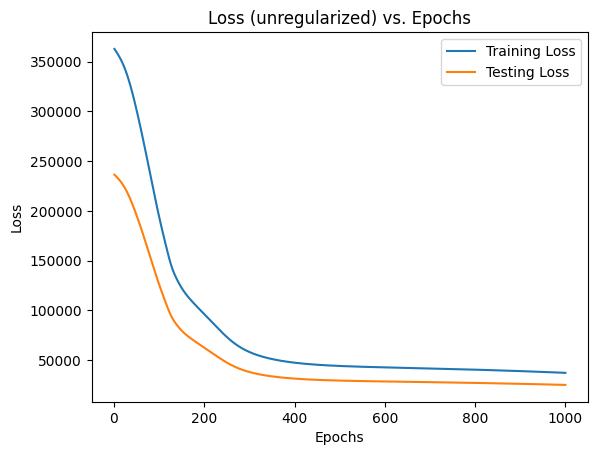

Pearson correlation coefficient for y1: 
0.8463740904728478


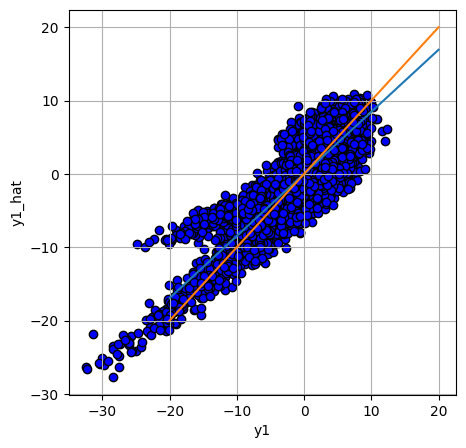

Pearson correlation coefficient for y2: 
0.9186773877738944


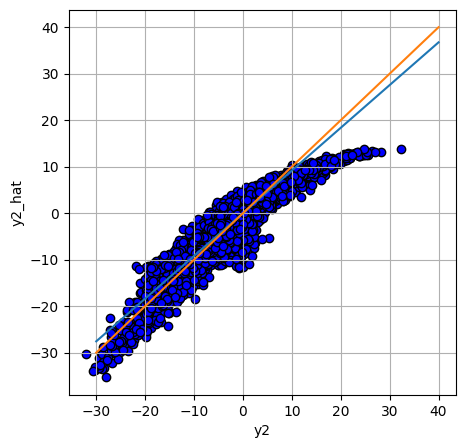

Pearson correlation coefficient for y3: 
0.9706282535481374


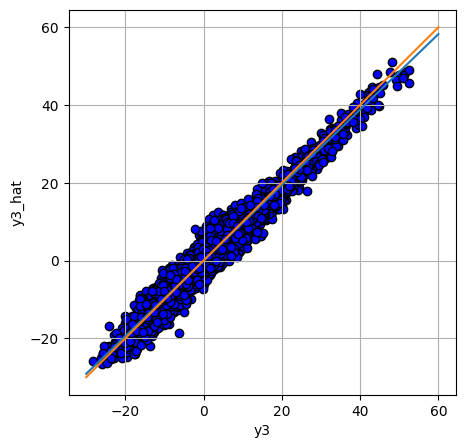

In [152]:
learning_rate = 0.001
epochs = 1000
losscriteria = nn.MSE()
modelfccq1_OF = modelfcc_q1()
loss_test = []
loss_train = []
N_train = len(Y_train)

for e in range(epochs):
    loss = 0
    t0 = time.time()

    # forward
    Y_hat = modelfccq1_OF.forward(X_train) #.flatten() print
    loss = losscriteria.evaluate(Y_hat, Y_train)
    loss_train.append(loss)

    # backprop
    loss_grad = losscriteria.grad()
    modelfccq1_OF.backward(loss_grad, learning_rate)
    t1 = time.time()
    loss_tst = losscriteria.evaluate(modelfccq1_OF.forward(X_test), Y_test)
    loss_test.append(loss_tst)
    if (e+1)%100 == 0:
        print("Time taken for epoch", e+1,":", t1 - t0, "seconds")
        print("completed: loss = {}".format(loss))

# display loss
natural_numbers = np.arange(1, epochs + 1)
plt.plot(natural_numbers, loss_train, label="Training Loss")
plt.plot(natural_numbers, loss_test, label="Testing Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss (unregularized) vs. Epochs")
plt.legend()
plt.show()
nn.pearson_plot(modelfccq1_OF.forward(X_test), Y_test)
